Notes:
To install the current Anaconda but then run a notebook in Python 3.5 instead of 3.6, I followed the instructions here: https://docs.anaconda.com/anaconda/faq#how-do-i-get-the-latest-anaconda-with-python-3-5
and then the instructions here: https://towardsdatascience.com/environment-management-with-conda-python-2-3-b9961a8a5097

In [1]:
import sys
sys.version

'3.5.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:11:22) \n[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]'

To make these packages available, I did this in the command line:
```
source activate ipy35
pip install numpy
pip install h5py
pip install osr
pip install matplotlib
conda install gdal
```

In [40]:
import numpy as np
import h5py
import gdal, osr, os
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

I couldn't get the file used in the lesson, so I downloaded this one from the API. TEAK 2017 was the only site-year I could find on the API with DP3.30006.001

It would be helpful to mention that that's the data product whose data we're exploring here

In [10]:
f = h5py.File('/Users/clunch/Desktop/NEON_D17_TEAK_DP3_312000_4092000_reflectance.h5','r')

In [11]:
def list_dataset(name,node):
    if isinstance(node, h5py.Dataset):
        print(name)

In [12]:
f.visititems(list_dataset)

TEAK/Reflectance/Metadata/Ancillary_Imagery/Aerosol_Optical_Depth
TEAK/Reflectance/Metadata/Ancillary_Imagery/Aspect
TEAK/Reflectance/Metadata/Ancillary_Imagery/Cast_Shadow
TEAK/Reflectance/Metadata/Ancillary_Imagery/Dark_Dense_Vegetation_Classification
TEAK/Reflectance/Metadata/Ancillary_Imagery/Data_Selection_Index
TEAK/Reflectance/Metadata/Ancillary_Imagery/Haze_Cloud_Water_Map
TEAK/Reflectance/Metadata/Ancillary_Imagery/Illumination_Factor
TEAK/Reflectance/Metadata/Ancillary_Imagery/Path_Length
TEAK/Reflectance/Metadata/Ancillary_Imagery/Sky_View_Factor
TEAK/Reflectance/Metadata/Ancillary_Imagery/Slope
TEAK/Reflectance/Metadata/Ancillary_Imagery/Smooth_Surface_Elevation
TEAK/Reflectance/Metadata/Ancillary_Imagery/Visibility_Index_Map
TEAK/Reflectance/Metadata/Ancillary_Imagery/Water_Vapor_Column
TEAK/Reflectance/Metadata/Ancillary_Imagery/Weather_Quality_Indicator
TEAK/Reflectance/Metadata/Coordinate_System/Coordinate_System_String
TEAK/Reflectance/Metadata/Coordinate_System/EPSG C

In [13]:
def ls_dataset(name,node):
    if isinstance(node,h5py.Dataset):
        print(node)

In [14]:
f.visititems(ls_dataset)

<HDF5 dataset "Aerosol_Optical_Depth": shape (1000, 1000), type "<i2">
<HDF5 dataset "Aspect": shape (1000, 1000), type "<f4">
<HDF5 dataset "Cast_Shadow": shape (1000, 1000), type "|u1">
<HDF5 dataset "Dark_Dense_Vegetation_Classification": shape (1000, 1000), type "|u1">
<HDF5 dataset "Data_Selection_Index": shape (1000, 1000), type "<i4">
<HDF5 dataset "Haze_Cloud_Water_Map": shape (1000, 1000), type "|u1">
<HDF5 dataset "Illumination_Factor": shape (1000, 1000), type "|u1">
<HDF5 dataset "Path_Length": shape (1000, 1000), type "<f4">
<HDF5 dataset "Sky_View_Factor": shape (1000, 1000), type "|u1">
<HDF5 dataset "Slope": shape (1000, 1000), type "<f4">
<HDF5 dataset "Smooth_Surface_Elevation": shape (1000, 1000), type "<f4">
<HDF5 dataset "Visibility_Index_Map": shape (1000, 1000), type "|u1">
<HDF5 dataset "Water_Vapor_Column": shape (1000, 1000), type "<f4">
<HDF5 dataset "Weather_Quality_Indicator": shape (1000, 1000, 3), type "|u1">
<HDF5 dataset "Coordinate_System_String": shap

In [15]:
teak_refl = f['TEAK']['Reflectance']
print(teak_refl)

<HDF5 group "/TEAK/Reflectance" (2 members)>


In [17]:
teak_reflArray = teak_refl['Reflectance_Data']
print(teak_reflArray)

<HDF5 dataset "Reflectance_Data": shape (1000, 1000, 426), type "<i2">


In [19]:
refl_shape = teak_reflArray.shape
print('TEAK Reflectance Data Dimensions:',refl_shape)

TEAK Reflectance Data Dimensions: (1000, 1000, 426)


In [20]:
wavelengths = teak_refl['Metadata']['Spectral_Data']['Wavelength']
print('wavelengths:',wavelengths)

wavelengths: <HDF5 dataset "Wavelength": shape (426,), type "<f4">


In [21]:
print('min wavelength:', np.amin(wavelengths), 'nm')
print('max wavelength:', np.amax(wavelengths), 'nm')

min wavelength: 381.273 nm
max wavelength: 2509.728 nm


In [22]:
print('band width between first 2 bands -', (wavelengths.value[1]-wavelengths.value[0]), 'nm')
print('band width between last 2 bands -', (wavelengths.value[-1]-wavelengths.value[-2]), 'nm')


band width between first 2 bands - 5.008087 nm
band width between last 2 bands - 5.0080566 nm


In [23]:
teak_mapInfo = teak_refl['Metadata']['Coordinate_System']['Map_Info']
print('TEAK Map Info:', teak_mapInfo.value)

TEAK Map Info: b'UTM,  1.000,  1.000,       312000.00,       4093000.0,       1.0000000,       1.0000000,  11,  North,  WGS-84,  units=Meters, 0'


In [24]:
mapInfo_string = str(teak_mapInfo.value)
mapInfo_string.split

<function str.split>

In [25]:
mapInfo_split = mapInfo_string.split(",")
print(mapInfo_split)

["b'UTM", '  1.000', '  1.000', '       312000.00', '       4093000.0', '       1.0000000', '       1.0000000', '  11', '  North', '  WGS-84', '  units=Meters', " 0'"]


In [26]:
res = float(mapInfo_split[5]), float(mapInfo_split[6])
print('Resolution:', res)

Resolution: (1.0, 1.0)


In [27]:
xMin = float(mapInfo_split[3])
yMax = float(mapInfo_split[4])
xMax = xMin + (refl_shape[1]*res[0])
yMin = yMax - (refl_shape[0]*res[1])

In [28]:
teak_ext = (xMin, xMax, yMin, yMax)
print('teak_ext:',teak_ext)
print('teak_ext type:',type(teak_ext))

teak_ext: (312000.0, 313000.0, 4092000.0, 4093000.0)
teak_ext type: <class 'tuple'>


In [29]:
teak_extDict = {}
teak_extDict['xMin']=xMin
teak_extDict['xMax']=xMax
teak_extDict['yMin']=yMin
teak_extDict['yMax']=yMax
print('teak_extDict:',teak_extDict)
print('teak_extDict type:',type(teak_extDict))

teak_extDict: {'yMax': 4093000.0, 'yMin': 4092000.0, 'xMin': 312000.0, 'xMax': 313000.0}
teak_extDict type: <class 'dict'>


In [36]:
b56 = teak_reflArray[:,:,55].astype(float)
print('b56 type:',type(b56))
print('b56 shape:',b56.shape)
print('Band 56 Reflectance:\n',b56)

b56 type: <class 'numpy.ndarray'>
b56 shape: (1000, 1000)
Band 56 Reflectance:
 [[-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 ...
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]]


In [41]:
scaleFactor = teak_reflArray.attrs['Scale_Factor']
noDataValue = teak_reflArray.attrs['Data_Ignore_Value']
print('Scale Factor:',scaleFactor)
print('Data Ignore Value:',noDataValue)

b56[b56==int(noDataValue)]=np.nan
b56 = b56/scaleFactor
print('Cleaned Band 56 Reflectance:/n',b56)

Scale Factor: 10000.0
Data Ignore Value: -9999.0
Cleaned Band 56 Reflectance:/n [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


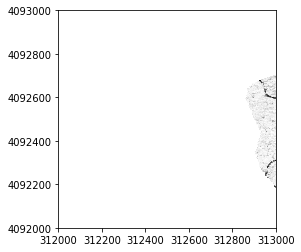

In [35]:
teak_plot = plt.imshow(b56,extent=teak_ext,cmap="Greys")

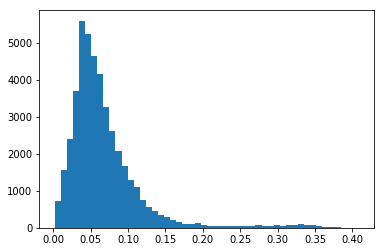

In [42]:
plt.hist(b56[~np.isnan(b56)],50);

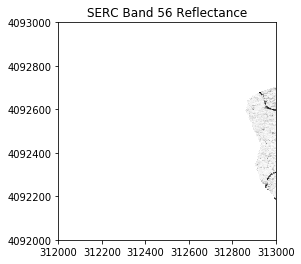

In [43]:
teak_plot = plt.imshow(b56,extent=teak_ext,cmap='Greys',clim=(0,0.4))
plt.title('SERC Band 56 Reflectance');